In [ ]:
import os
import cv2
import torch
import pyewts
import random
from glob import glob
from natsort import natsorted
from Modules import Easter2Inference, TrOCRInference, CRNNInference
from huggingface_hub import snapshot_download
from Utils import read_ctc_model_config, show_image

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available else 'cpu')
print(device)

# set up wylie converter and the CER scorer
converter = pyewts.pyewts()

In [4]:
# setup data: use remote dataset or a local directory
data_path = snapshot_download(repo_id="BDRC/KhyentseWangpo", repo_type="dataset",  cache_dir="Datasets")
lines = natsorted(glob(f"{data_path}/lines/*.jpg"))

print(f"Images: {len(lines)}")

Fetching 202 files: 100%|██████████| 202/202 [00:00<00:00, 1986.65it/s]

Images: 100


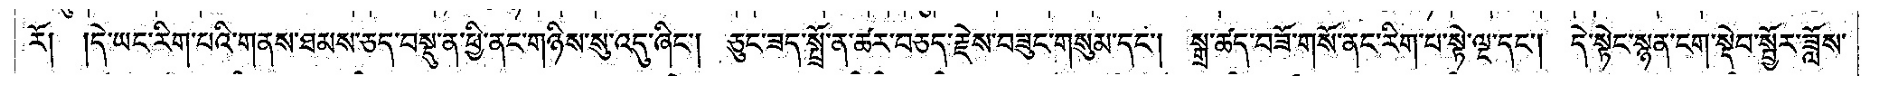

In [14]:
idx = random.randint(0, len(lines)-1)
img = cv2.imread(lines[idx])
show_image(img)

#### Inference CRNN Model

In [ ]:
# download the model: https://huggingface.co/BDRC/GoogleBooks_C_v1
model_id = "BDRC/GoogleBooks_C_v1"
model_path = snapshot_download(
                repo_id=model_id,
                repo_type="model",
                local_dir=f"Models/{model_id}",
            )

print(model_path)
model_config = f"{model_path}/config.json"

assert(os.path.isfile(model_config))

ocr_config = read_ctc_model_config(model_config)
crnn_inference = CRNNInference(ocr_config)

རོ། ། དེ་ཡང་རིག་པའི་གནས་ཐམས་ཅད་བསྡུ་ན་ཕྱི་ནང་གཉིས་སུ་འདུ་ཞིང་། ཅུང་ཟད་སྤྲོ་ན་ཚར་བཅད་རྗེས་བཟུང་གསུམ་དང་། སྒྲ་ཚད་བཟོ་གསོ་ནང་རིག་པ་སྟེ་ལྔ་དང་། དེ་སྟེང་སྙན་ངག་སྡེབ་སྦྱོར་ཟློས་


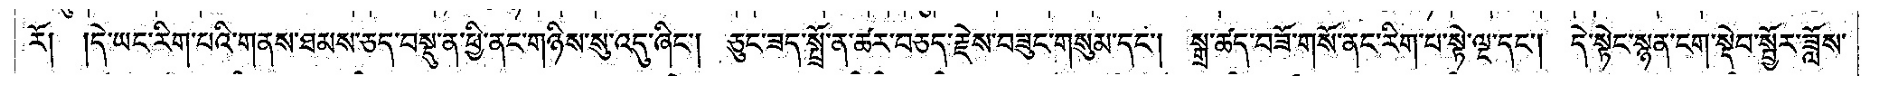

In [15]:
prediction = crnn_inference.predict(img)
prediction = prediction.replace("/", "/_")
prediction = converter.toUnicode(prediction)
print(prediction)
show_image(img)

#### Inference Easter2 Model

In [ ]:
# download the model: https://huggingface.co/BDRC/GoogleBooks_E_v1
model_id = "BDRC/GoogleBooks_E_v1"
model_path = snapshot_download(
                repo_id=model_id,
                repo_type="model",
                local_dir=f"Models/{model_id}",
            )

print(model_path)
model_config = f"{model_path}/config.json"

assert(os.path.isfile(model_config))

ocr_config = read_ctc_model_config(model_config)
easter2_inference = Easter2Inference(ocr_config)

རོ། ། དེ་ཡང་རིག་པའི་གནས་ཐམས་ཅད་བསྡུ་ན་ཕྱི་ནང་གཉིས་སུ་འདུ་ཞིང་། ཅུང་ཟད་སྤྲོ་ན་ཚར་བཅད་རྗེས་བཟུང་གསུམ་དང་། སྒྲ་ཚད་བཟོ་གསོ་ནང་རིག་པ་སྟེ་ལྔ་དང་། དེ་སྟེང་སྙན་ངག་སྡེབ་སྦྱོར་ཟློས་། 


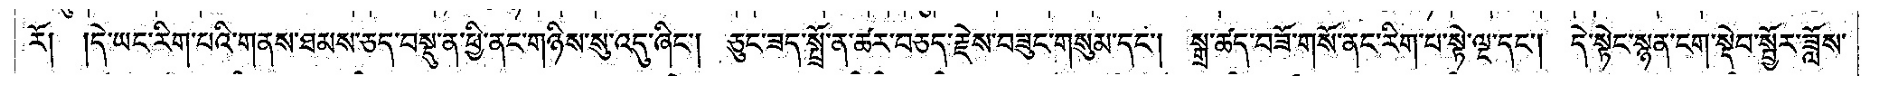

In [18]:
prediction = easter2_inference.predict(img)
prediction = prediction.replace("/", "/_")
prediction = converter.toUnicode(prediction)
print(prediction)
show_image(img)

#### Inference TrOCR Model

In [ ]:
model_id = "BDRC/GoogleBooks_T_v1"
checkpoint = snapshot_download(
                repo_id=model_id,
                repo_type="model",
                local_dir=f"Models/{model_id}",
            )
trocr_inference = TrOCRInference(checkpoint)

དོ། ། དེ་ལ་འདི་ལ་རིགས་པ་ཐམས་ཅད་ལྡན་པར་གྱུར་ཅིག་ཅེས་གསུང་ཞིང་། བྱང་ཆུབ་ཀྱི་སེམས་ཅན་རྣམས་ལ་ཕྱག་འཚལ་ལ། རླུང་ནད་ཐོག་མེད་པའི་སྡུག་བསྔལ་དང་། ཉེ་སྟོང་སྣ་ཚོགས་སྦྱོར་བ་ 


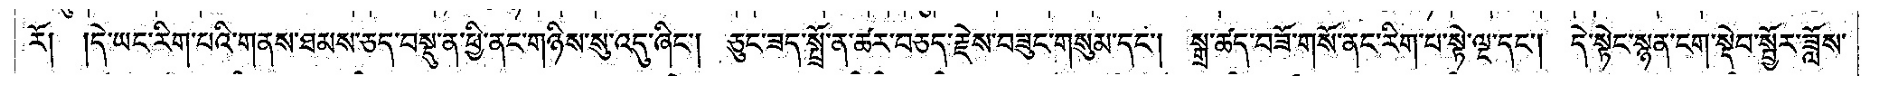

In [20]:
prediction = trocr_inference.predict(img)
print(prediction)
show_image(img)